
![Py4Eng](https://dl.dropboxusercontent.com/u/1578682/py4eng_logo.png)

# Jupyter Notebook: Rich display
## Yoav Ram

# Introduction to the notebook

We start with a short presentation by [Fernando Perez](http://fperez.org/), founder of the IPython project.
We use the notebook's rich display system to show the presentation - we'll how understand to do that soon.

In [2]:
from IPython.display import HTML

In [2]:
HTML('<script async class="speakerdeck-embed" data-id="5cd35ca0e91b01319d42227239d9f24b" data-ratio="1.33333333333333" src="//speakerdeck.com/assets/embed.js"></script>')

# Rich display system

The notebook has a rich display system that uses the fact that the notebook runs in a browser - an omnipotent rendering machine.

IPython allows objects to declare rich representations using different formats:

- HTML
- JSON
- PNG
- JPEG
- SVG
- LaTeX
- YouTubeVideo

A single object can declare some or all of these representations; all are handled by IPython's display system. This Notebook shows how you can use this display system to incorporate a broad range of content into your Notebooks.

This section follows [Wojciech Jaśkowski's course notebook](http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/lectures/notebooks/ipython-notebook.html).

## Basic display imports

The display function is a general purpose tool for displaying different representations of objects. Think of it as print for these rich representations.


In [3]:
from IPython.display import display

A few points:

- Calling display on an object will send all possible representations to the Notebook.
- These representations are stored in the Notebook document.
- In general the Notebook will use the richest available representation.

If you want to display a particular representation, there are specific functions for that:

In [4]:
from IPython.display import display_pretty, display_html, display_jpeg, display_png, display_json, display_latex, display_svg

## Images

To work with images (JPEG, PNG) use the Image class.


In [5]:
from IPython.display import Image

Returning an Image object from an expression will automatically display it:

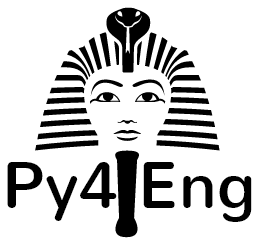

In [6]:
i = Image(r'img\logo.png')
i



Or you can pass it to display:


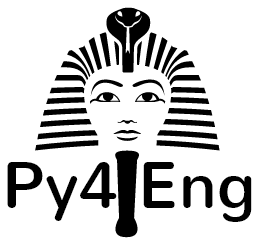

In [11]:
display(i)



SVG images are also supported out of the box (since modern browsers do a good job of rendering them). Note that images can be loaded with a URL instead of a filename.


In [12]:
from IPython.display import SVG
SVG('https://www.python.org/static/community_logos/python-logo-generic.svg')


## Links to local files

If we want to create a link to one of them, we can call use the FileLink object.


In [14]:
from IPython.display import FileLink, FileLinks
FileLink('if-while.ipynb')

D:\workspace\Py4Eng\sessions\if-while.ipynb



Alternatively, if we want to link to all of the files in a directory, we can use the FileLinks object, passing '.' to indicate that we want links generated for the current working directory. Note that if there were other directories under the current directory, FileLinks would work in a recursive manner creating links to files in all sub-directories as well.


In [15]:
FileLinks('.')

./
  calculus.ipynb
  csv.ipynb
  curve-fitting.ipynb
  dictionaries.ipynb
  differential-equations.ipynb
  DSP.ipynb
  exceptions.ipynb
  functions.ipynb
  gui.ipynb
  idioms.ipynb
  if-while.ipynb
  image-processing.ipynb
  inflammation-01.csv
  io.ipynb
  linear-algebra.ipynb
  matplotlib-aesthetics.ipynb
  matplotlib.ipynb
  ML.ipynb
  modules.ipynb
  notebook-display.ipynb
  notebook-magic.ipynb
  numpy.ipynb
  oop.ipynb
  optimization.ipynb
  pandas-seaborn.ipynb
  probability.ipynb
  regexp.ipynb
  requests.ipynb
  statistics.ipynb
  strings-lists-loops.ipynb
  tmp.txt
  types-operators.ipynb
.\.ipynb_checkpoints/
  calculus-checkpoint.ipynb
  csv-checkpoint.ipynb
  curve-fitting-checkpoint.ipynb
  dictionaries-checkpoint.ipynb
  differential-equations-checkpoint.ipynb
  DSP-checkpoint.ipynb
  exceptions-checkpoint.ipynb
  functions-checkpoint.ipynb
  gui-checkpoint.ipynb
  idioms-checkpoint.ipynb
  if-while-checkpoint.ipynb
  image-processing-checkpoint.ipynb
  io-checkpoint.ipynb
  linear-algebra-checkpoint.ipynb
  matplotlib-aesthetics-checkpoint.ipynb
  matplotlib-checkpoint.ipynb
  ML-checkpoint.ipynb
  modules-checkpoint.ipynb
  notebook-display-checkpoint.ipynb
  notebook-magic-checkpoint.ipynb
  numpy-checkpoint.ipynb
  numpy-matplotlib-checkpoint.ipynb
  numpy-matplotlib_2-checkpoint.ipynb
  oop-checkpoint.ipynb
  optimization-checkpoint.ipynb
  pandas-seaborn-checkpoint.ipynb
  probability-checkpoint.ipynb
  regexp-checkpoint.ipynb
  requests-checkpoint.ipynb
  session3a-checkpoint.ipynb
  statistics-checkpoint.ipynb
  strings-lists-loops-checkpoint.ipynb
  types-operators-checkpoint.ipynb
.\img/
  QtDesigner.PNG

## Embedded vs Non-embedded Images

By default, image data is embedded in the Notebook document so that the images can be viewed offline. However it is also possible to tell the Image class to only store a link to the image. Let's see how this works using a webcam at Berkeley.

By default Image data are embedded; here is the embedded version. Note that this image was pulled from the webcam when this code cell was originally run and stored in the Notebook. Unless we rerun this cell, this is not todays image.


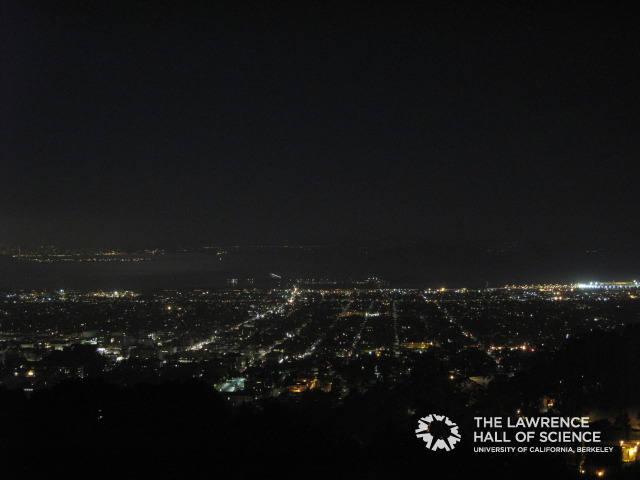

In [7]:
berkeley_url = 'http://static.lawrencehallofscience.org/scienceview/scienceview.berkeley.edu/html/view/view_assets/images/newview.jpg'

embed = Image(berkeley_url)
embed

If kwarg `url` is given, the embedding is assumed to be false. 

Here is today's image from same webcam at Berkeley, (refreshed every minutes, if you reload the notebook), visible only with an active internet connection, that should be different from the previous one (unless you just re-run the previous cell).

Notebooks saved with this kind of image will be take less space and always reflect the current version of the source, but the image won't display offline.


In [8]:
soft_linked = Image(url=berkeley_url)
soft_linked

Of course, if you re-run this Notebook, the two images will be the same again.


In each case, embed can be specified explicitly with the `embed` kwarg:

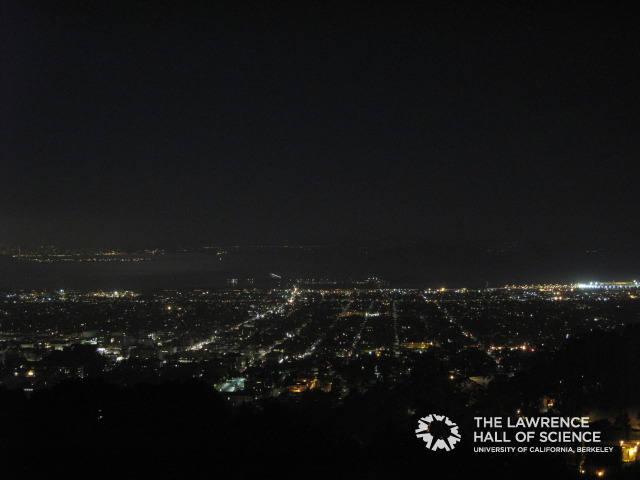

In [9]:
force_embed = Image(url=berkeley_url, embed=True)
force_embed

## Video

More exotic objects can also be displayed, as long as their representation supports the IPython display protocol. For example, videos hosted externally on YouTube are easy to load (and writing a similar wrapper for other hosted content is trivial):


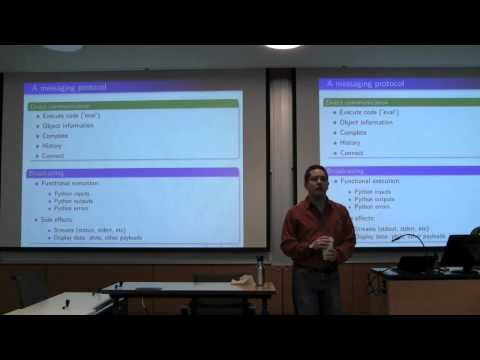

In [27]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('1j_HxD4iLn8')



Using the nascent video capabilities of modern browsers, you may also be able to display local videos. At the moment this doesn't work very well in all browsers, so it may or may not work for you; we will continue testing this and looking for ways to make it more robust.

The following cell plays a local file called wildlife.mp4 using the HTML5 video tag. This might not work on older browsers (tested with [Firefox](https://www.mozilla.org/en-US/firefox) 43).

In [30]:
HTML("""
<video width="320" height="240" controls>
  <source src="../data/wildlife.mp4" type="video/mp4">
</video>
""")


## HTML

Python objects can declare HTML representations that will be displayed in the Notebook. If you have some HTML you want to display, simply use the HTML class.


In [31]:
s = """<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>"""

h = HTML(s)
h

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


Here is a small amount of stock data for APPL, written to a file using the magic `file`:


In [32]:
%%file data.csv
Date,Open,High,Low,Close,Volume,Adj Close
2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53

Writing data.csv


Pandas makes use of this capability to allow DataFrames to be represented as HTML tables.

Read this as into a `DataFrame` (we'll talk more about *Pandas* in a different session):

In [33]:
import pandas as pd
df = pd.read_csv('data.csv')

By default, DataFrames will be represented as HTML:

In [34]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
1,2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2,2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
3,2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
4,2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
5,2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53


If we use the `print` function we will get the text representation:

In [35]:
print(df)

         Date    Open    High     Low   Close    Volume  Adj Close
0  2012-06-01  569.16  590.00  548.50  584.00  14077000     581.50
1  2012-05-01  584.90  596.76  522.18  577.73  18827900     575.26
2  2012-04-02  601.83  644.00  555.00  583.98  28759100     581.48
3  2012-03-01  548.17  621.45  516.22  599.55  26486000     596.99
4  2012-02-01  458.41  547.61  453.98  542.44  22001000     540.12
5  2012-01-03  409.40  458.24  409.00  456.48  12949100     454.53


## External sites

You can even embed an entire page from another site in an iframe; for example this is today's Wikipedia page for mobile users:


In [36]:
from IPython.display import HTML
HTML('<iframe src=http://wikipedia.org width=700 height=350></iframe>')

## LaTeX

And we also support the display of mathematical expressions typeset in LaTeX, which is rendered in the browser thanks to the [MathJax](http://mathjax.org/) library.


In [37]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

With the Latex class, you have to include the delimiters yourself. This allows you to use other LaTeX modes such as eqnarray:

In [38]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

Or you can enter latex directly with the %%latex cell magic:


In [39]:
%%latex
\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}

<IPython.core.display.Latex object>

## Colophon
This notebook was written by [Yoav Ram](http://www.yoavram.com) and is part of the _Python for Engineers_ course.

The notebook was written using [Python](http://pytho.org/) 3.4.4, [IPython](http://ipython.org/) 4.0.3 and [Jupyter](http://jupyter.org) 4.0.6.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)